In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action ='ignore', category = FutureWarning)

pd.set_option('display.max_columns', None) # To see all columns

df = pd.read_csv("eco2mix-regional-cons-def.csv", index_col = 0, sep=";")
df.head()

,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 30
Code INSEE région,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
28,Normandie,Données consolidées,2021-08-07,19:30,2021-08-07T19:30:00+02:00,2114.0,185.0,5382.0,566.0,28.0,8.0,NaN,58.0,50.0,-4112.0,8.75,12.98,254.59,26.77,62.47,1.32,12.90,0.38,26.67,2.74,39.46,NaN,NaN,NaN,NaN,NaN
28,Normandie,Données consolidées,2021-08-07,21:00,2021-08-07T21:00:00+02:00,2051.0,185.0,5492.0,514.0,3.0,8.0,NaN,57.0,51.0,-4209.0,9.02,12.98,267.77,25.06,56.73,0.15,1.38,0.39,26.67,2.78,38.78,NaN,NaN,NaN,NaN,NaN
28,Normandie,Données consolidées,2021-08-07,22:30,2021-08-07T22:30:00+02:00,2361.0,185.0,5386.0,394.0,0.0,8.0,NaN,58.0,50.0,-3670.0,7.84,12.98,228.12,16.69,43.49,0.00,0.00,0.34,26.67,2.46,39.46,NaN,NaN,NaN,NaN,NaN
28,Normandie,Données consolidées,2021-08-08,01:30,2021-08-08T01:30:00+02:00,2039.0,186.0,5302.0,318.0,0.0,8.0,NaN,56.0,49.0,-3831.0,9.12,13.05,260.03,15.60,35.10,0.00,0.00,0.39,26.67,2.75,38.10,NaN,NaN,NaN,NaN,NaN
28,Normandie,Données consolidées,2021-08-08,04:00,2021-08-08T04:00:00+02:00,1770.0,185.0,5381.0,251.0,0.0,8.0,NaN,52.0,50.0,-4107.0,10.45,12.98,304.01,14.18,27.70,0.00,0.00,0.45,26.67,2.94,35.37,NaN,NaN,NaN,NaN,NaN


In [3]:
#### Initial information about the dataframe:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980288 entries, 28 to 93
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Région               object 
 1   Nature               object 
 2   Date                 object 
 3   Heure                object 
 4   Date - Heure         object 
 5   Consommation (MW)    float64
 6   Thermique (MW)       float64
 7   Nucléaire (MW)       float64
 8   Eolien (MW)          float64
 9   Solaire (MW)         float64
 10  Hydraulique (MW)     float64
 11  Pompage (MW)         float64
 12  Bioénergies (MW)     float64
 13  Ech. physiques (MW)  float64
 14  Stockage batterie    float64
 15  Déstockage batterie  float64
 16  Eolien terrestre     float64
 17  Eolien offshore      float64
 18  TCO Thermique (%)    float64
 19  TCH Thermique (%)    float64
 20  TCO Nucléaire (%)    float64
 21  TCH Nucléaire (%)    float64
 22  TCO Eolien (%)       float64
 23  TCH Eolien (%)       float64
 24  TC

Région                       0
Nature                       0
Date                         0
Heure                        0
Date - Heure                 0
Consommation (MW)           12
Thermique (MW)              12
Nucléaire (MW)          825127
Eolien (MW)                108
Solaire (MW)                12
Hydraulique (MW)            12
Pompage (MW)            860167
Bioénergies (MW)            12
Ech. physiques (MW)     136908
Stockage batterie      1700928
Déstockage batterie    1736064
Eolien terrestre       1736064
Eolien offshore        1837824
TCO Thermique (%)      1472256
TCH Thermique (%)      1472256
TCO Nucléaire (%)      1582176
TCH Nucléaire (%)      1582176
TCO Eolien (%)         1472256
TCH Eolien (%)         1472256
TCO Solaire (%)        1472256
TCH Solaire (%)        1472256
TCO Hydraulique (%)    1716480
TCH Hydraulique (%)    1716480
TCO Bioénergies (%)    1716480
TCH Bioénergies (%)    1716480
Column 30              1980288
dtype: int64

In [4]:
###Remove the data before 2019:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"]= df["Date"].dt.year
###Create a new dataframe consisting of only the data between 2019 and 2022.
df= df[df["Year"]>2018]

### To reset index after the reduction of the dataframe
df = df.reset_index(drop = True)

#### Remove unnecessary, irrelevant columns, along with columns containing too many missing values:
df = df.drop(["Nature", "Date - Heure", "Eolien terrestre", "Eolien offshore", "Column 30", 
              "TCO Thermique (%)", "TCH Thermique (%)", "TCO Nucléaire (%)", "TCH Nucléaire (%)", "TCO Eolien (%)", 
              "TCH Eolien (%)","TCO Solaire (%)", "TCH Solaire (%)", "TCO Hydraulique (%)", "TCH Hydraulique (%)", 
              "TCO Bioénergies (%)", "TCH Bioénergies (%)"], axis=1)
df.isna().sum()

Région                      0
Date                        0
Heure                       0
Consommation (MW)           0
Thermique (MW)              0
Nucléaire (MW)         299280
Eolien (MW)                 0
Solaire (MW)                0
Hydraulique (MW)            0
Pompage (MW)           299280
Bioénergies (MW)            0
Ech. physiques (MW)    136896
Stockage batterie      438912
Déstockage batterie    474048
Year                        0
dtype: int64

In [5]:
####Translate the remaining columns to English from French:
new_col_names = ["Region", "Date", "Hour", "Consumption", "Thermal", "Nuclear", 
                 "Wind", "Solar", "Hydraulic", "Consumption by pumps", "Bioenergy", "Imp_exp Balance", 
                 "Battery storage", "Battery disposal", "Year"]
df.columns = new_col_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718272 entries, 0 to 718271
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Region                718272 non-null  object        
 1   Date                  718272 non-null  datetime64[ns]
 2   Hour                  718272 non-null  object        
 3   Consumption           718272 non-null  float64       
 4   Thermal               718272 non-null  float64       
 5   Nuclear               418992 non-null  float64       
 6   Wind                  718272 non-null  float64       
 7   Solar                 718272 non-null  float64       
 8   Hydraulic             718272 non-null  float64       
 9   Consumption by pumps  418992 non-null  float64       
 10  Bioenergy             718272 non-null  float64       
 11  Imp_exp Balance       581376 non-null  float64       
 12  Battery storage       279360 non-null  float64       
 13 

In [6]:
###Add day and month columns:
df["Day"]=df["Date"].dt.day
df["Month"]=df["Date"].dt.month
day= df.pop("Day")
df.insert(4, "Day", day)
month= df.pop("Month")
df.insert(5, "Month", month)
df.head()

,Region,Date,Hour,Consumption,Day,Month,Thermal,Nuclear,Wind,Solar,Hydraulic,Consumption by pumps,Bioenergy,Imp_exp Balance,Battery storage,Battery disposal,Year
0,Normandie,2021-08-07,19:30,2114.0,7,8,185.0,5382.0,566.0,28.0,8.0,NaN,58.0,50.0,-4112.0,8.75,2021
1,Normandie,2021-08-07,21:00,2051.0,7,8,185.0,5492.0,514.0,3.0,8.0,NaN,57.0,51.0,-4209.0,9.02,2021
2,Normandie,2021-08-07,22:30,2361.0,7,8,185.0,5386.0,394.0,0.0,8.0,NaN,58.0,50.0,-3670.0,7.84,2021
3,Normandie,2021-08-08,01:30,2039.0,8,8,186.0,5302.0,318.0,0.0,8.0,NaN,56.0,49.0,-3831.0,9.12,2021
4,Normandie,2021-08-08,04:00,1770.0,8,8,185.0,5381.0,251.0,0.0,8.0,NaN,52.0,50.0,-4107.0,10.45,2021


In [7]:
####Check missing values in df before creating new columns:
df.isna().sum()
#### Handling the missing values in column "Nuclear (MW)":
df["Nuclear"] = df["Nuclear"].fillna(0.0)
df.isna().sum()

Region                       0
Date                         0
Hour                         0
Consumption                  0
Day                          0
Month                        0
Thermal                      0
Nuclear                      0
Wind                         0
Solar                        0
Hydraulic                    0
Consumption by pumps    299280
Bioenergy                    0
Imp_exp Balance         136896
Battery storage         438912
Battery disposal        474048
Year                         0
dtype: int64

In [8]:
#### Create new columns "Total Production (MW)" and "Total Renewable Production (MW)"
df["Total Production"] = df["Thermal"] + df["Nuclear"] + df["Wind"] + df["Solar"] + df["Hydraulic"] + df["Bioenergy"]
df["Total Renewable Production"] = df["Thermal"] + df["Wind"] + df["Solar"] + df["Hydraulic"] + df["Bioenergy"]
df.head()

,Region,Date,Hour,Consumption,Day,Month,Thermal,Nuclear,Wind,Solar,Hydraulic,Consumption by pumps,Bioenergy,Imp_exp Balance,Battery storage,Battery disposal,Year,Total Production,Total Renewable Production
0,Normandie,2021-08-07,19:30,2114.0,7,8,185.0,5382.0,566.0,28.0,8.0,NaN,58.0,50.0,-4112.0,8.75,2021,6227.0,845.0
1,Normandie,2021-08-07,21:00,2051.0,7,8,185.0,5492.0,514.0,3.0,8.0,NaN,57.0,51.0,-4209.0,9.02,2021,6259.0,767.0
2,Normandie,2021-08-07,22:30,2361.0,7,8,185.0,5386.0,394.0,0.0,8.0,NaN,58.0,50.0,-3670.0,7.84,2021,6031.0,645.0
3,Normandie,2021-08-08,01:30,2039.0,8,8,186.0,5302.0,318.0,0.0,8.0,NaN,56.0,49.0,-3831.0,9.12,2021,5870.0,568.0
4,Normandie,2021-08-08,04:00,1770.0,8,8,185.0,5381.0,251.0,0.0,8.0,NaN,52.0,50.0,-4107.0,10.45,2021,5877.0,496.0


In [9]:
#### Reorganize the columns:
df = df.loc[:, ['Region', 'Date', 'Hour', 'Day', 'Month', 'Year', 'Consumption','Total Production', 
                'Total Renewable Production', 'Nuclear', 'Thermal', 'Wind', 'Solar', 'Hydraulic', 'Bioenergy', 
                'Consumption by pumps', 'Imp_exp Balance', 'Battery storage', 'Battery disposal']]
df.head()

,Region,Date,Hour,Day,Month,Year,Consumption,Total Production,Total Renewable Production,Nuclear,Thermal,Wind,Solar,Hydraulic,Bioenergy,Consumption by pumps,Imp_exp Balance,Battery storage,Battery disposal
0,Normandie,2021-08-07,19:30,7,8,2021,2114.0,6227.0,845.0,5382.0,185.0,566.0,28.0,8.0,58.0,NaN,50.0,-4112.0,8.75
1,Normandie,2021-08-07,21:00,7,8,2021,2051.0,6259.0,767.0,5492.0,185.0,514.0,3.0,8.0,57.0,NaN,51.0,-4209.0,9.02
2,Normandie,2021-08-07,22:30,7,8,2021,2361.0,6031.0,645.0,5386.0,185.0,394.0,0.0,8.0,58.0,NaN,50.0,-3670.0,7.84
3,Normandie,2021-08-08,01:30,8,8,2021,2039.0,5870.0,568.0,5302.0,186.0,318.0,0.0,8.0,56.0,NaN,49.0,-3831.0,9.12
4,Normandie,2021-08-08,04:00,8,8,2021,1770.0,5877.0,496.0,5381.0,185.0,251.0,0.0,8.0,52.0,NaN,50.0,-4107.0,10.45


In [10]:
#### Handling the rest of the missing values in other columns:
df[["Consumption by pumps", "Imp_exp Balance", "Battery storage", "Battery disposal"]] = df[["Consumption by pumps", "Imp_exp Balance", "Battery storage", "Battery disposal"]].fillna(0.0)
df.isna().sum()

Region                        0
Date                          0
Hour                          0
Day                           0
Month                         0
Year                          0
Consumption                   0
Total Production              0
Total Renewable Production    0
Nuclear                       0
Thermal                       0
Wind                          0
Solar                         0
Hydraulic                     0
Bioenergy                     0
Consumption by pumps          0
Imp_exp Balance               0
Battery storage               0
Battery disposal              0
dtype: int64

In [11]:
#### Check if there are any special characters in categorical variables:
print(df["Region"][df["Region"].str.contains(".*[@_!#$%^&*()<>?/\|}{~:].*",regex=True)].unique())
print(df["Hour"][df["Hour"].str.contains(".*[@_!#$%^&*()<>?/\|}{~].*",regex=True)].unique())

[]
[]


In [12]:
#### ANOVA TEST - Correlation between "Consumption" and other qualitative variables
import statsmodels.api
from statsmodels.formula.api import ols
formula = 'Consumption ~ C(Region) + C(Hour)'
result= statsmodels.formula.api.ols(formula=formula, data=df).fit()
table= statsmodels.api.stats.anova_lm(result)
display(table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Region),11.0,2.310706e+12,2.100642e+11,196417.843635,0.0
C(Hour),47.0,8.025142e+10,1.707477e+09,1596.554434,0.0
Residual,718213.0,7.681117e+11,1.069476e+06,NaN,NaN


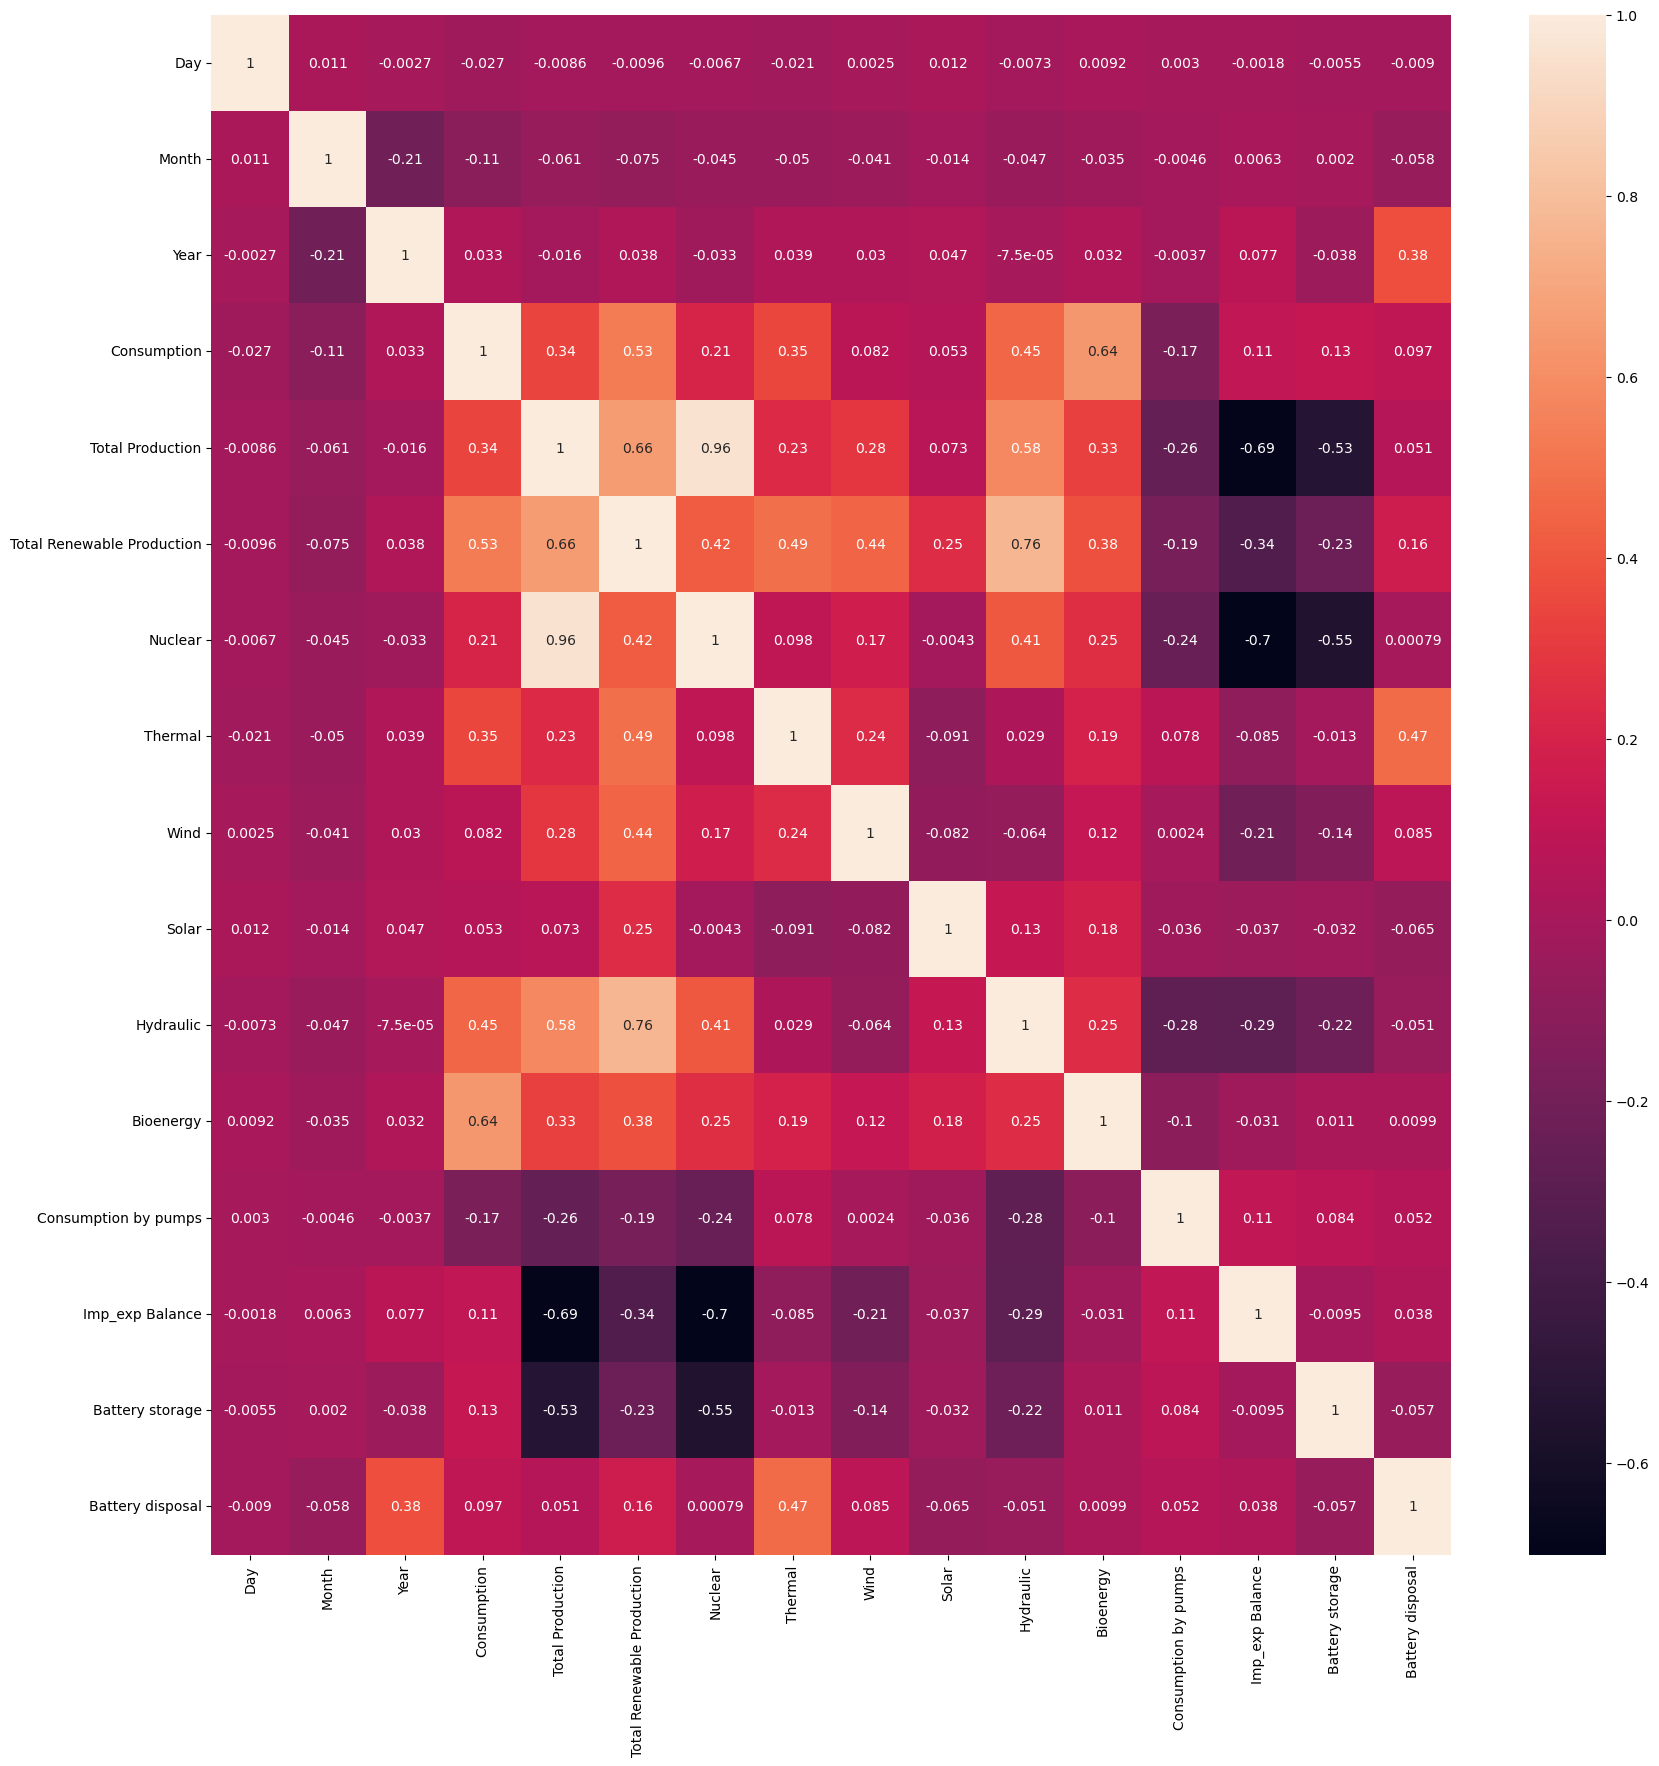

In [13]:
####Plot the columns correlation heatmap:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

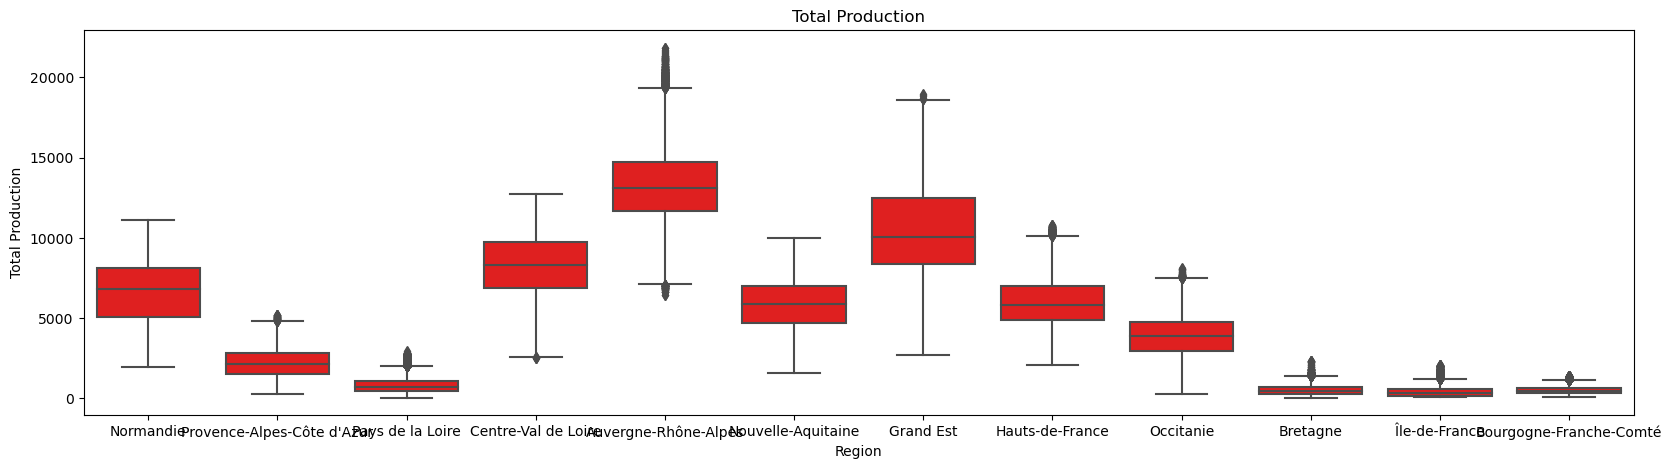

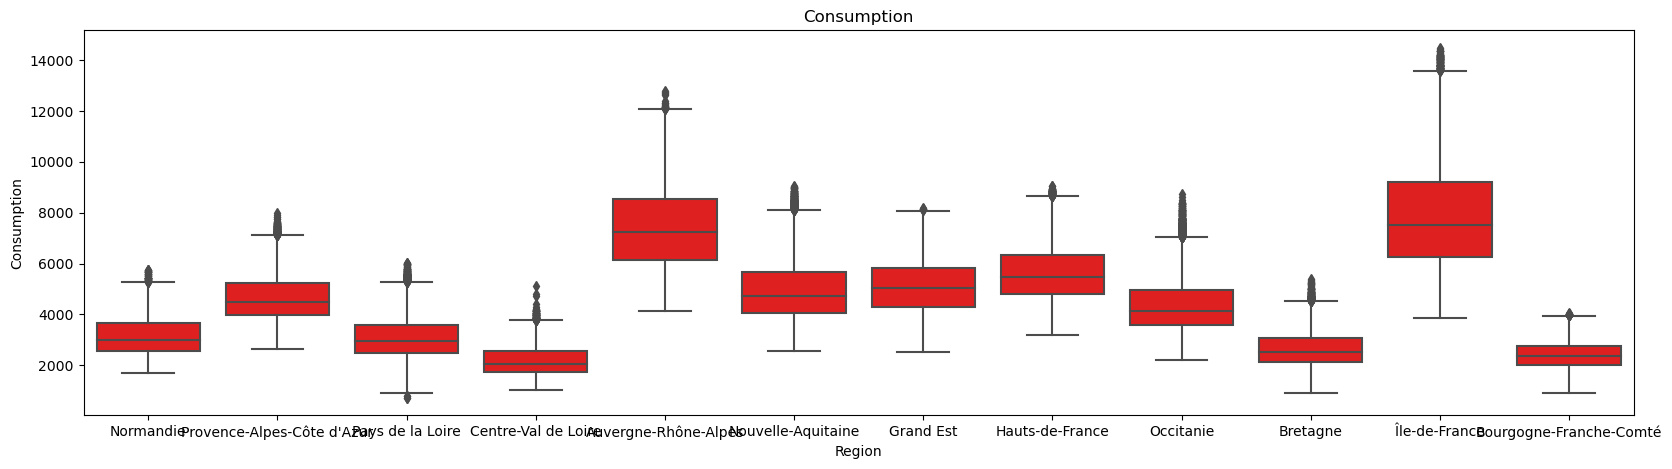

In [14]:
#### Descriptive analysis of "Consumption" and "Total Prtoduction" with Boxplot:
Col = ["Total Production", "Consumption"]
for i in Col:
    fig, axs = plt.subplots(1,1, figsize=(20,5))
    sns.boxplot(y=df[i], x=df["Region"], ax= axs, color="red")
    plt.title(i)

###Data Visualization:

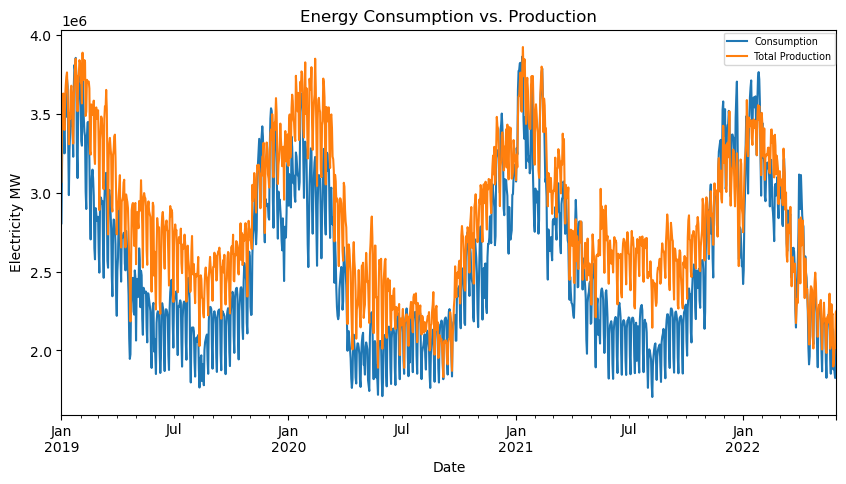

In [14]:
### Consumption vs Production from beginning till end by time:
con_prod = df.groupby("Date").sum().iloc[:,3:5]
fig, ax = plt.subplots(figsize=(10, 5))
con_prod.plot(kind='line', ylabel="Electricity MW", ax=ax)
plt.legend(loc="right", bbox_to_anchor=(0.505, 0.7, 0.5, 0.5), fontsize="x-small")
plt.title("Energy Consumption vs. Production");

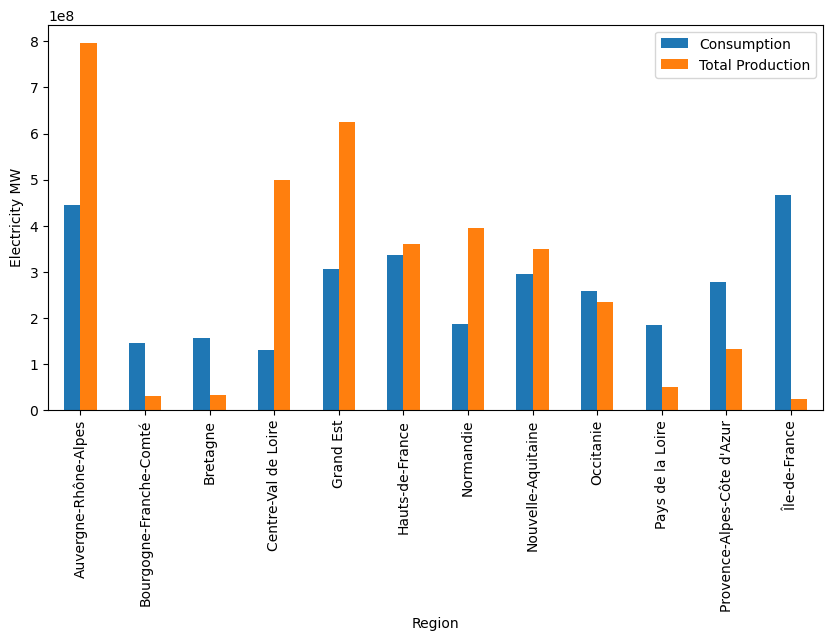

In [15]:
### The total production and consumption of energy in France per regions
totals = df.groupby("Region").sum().iloc[:,3:5]
fig, ax = plt.subplots(figsize=(10, 5))
totals.plot(kind='bar', ylabel="Electricity MW", ax=ax);

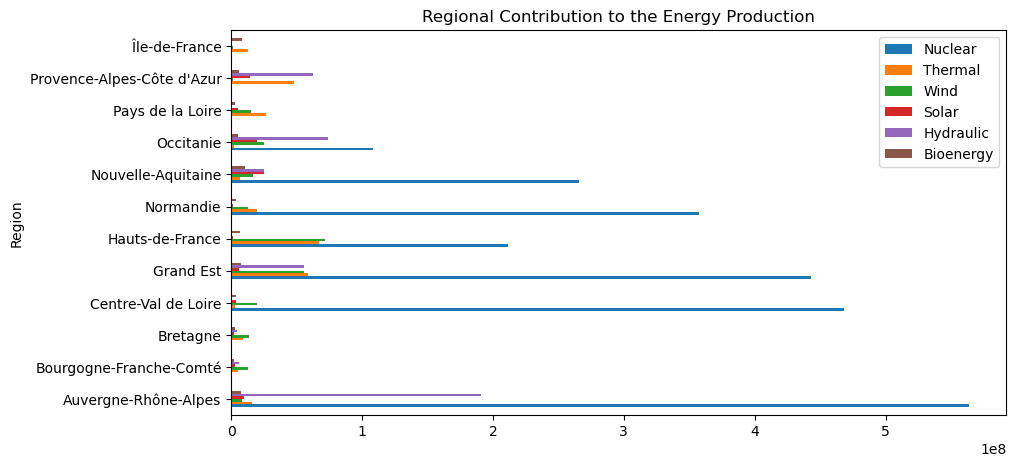

In [16]:
####Determine the regional contribution to the overall energy production in France:
energy_reg = df.groupby("Region").sum().iloc[:,6:12]
fig, ax = plt.subplots(figsize=(10, 5))
energy_reg.plot(kind='barh', ylabel="Electricity MW", ax=ax)
plt.title("Regional Contribution to the Energy Production");

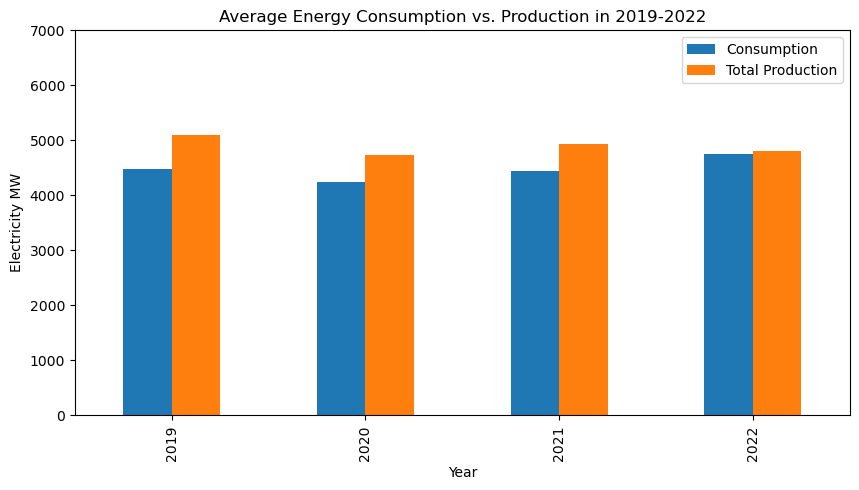

In [17]:
### The total production and energy consumption of France during years
totals_year = (df.groupby("Year").mean().iloc[:,2:4])
diff = df["Total Production"] - df["Consumption"]
fig, ax = plt.subplots(figsize=(10, 5))
totals_year.plot(kind='bar', ylabel="Electricity MW", ax=ax)
plt.ylim(0,7000)
plt.title("Average Energy Consumption vs. Production in 2019-2022");

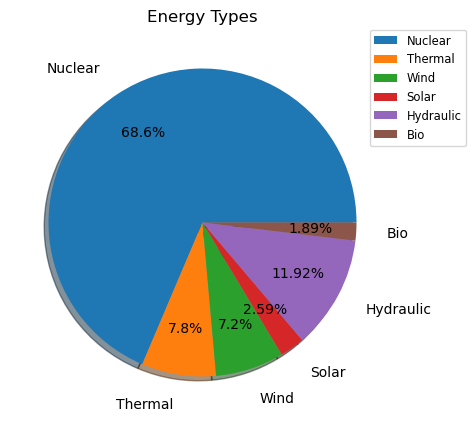

In [18]:
###The share of different energy resources in the total production - pie chart
df_energy= df.iloc[:,9:15].sum()
plt.figure(figsize= (5,5))
plt.pie(x = df_energy, labels = ["Nuclear", "Thermal", "Wind", "Solar", "Hydraulic", "Bio"], 
        explode = [0,0,0,0,0,0], autopct = lambda x: str(round(x,2)) + "%", labeldistance = 1.2, pctdistance = 0.7, shadow = True)
plt.legend(loc="right", bbox_to_anchor=(0.7, 0.6, 0.5, 0.5), fontsize="small");
plt.title("Energy Types");

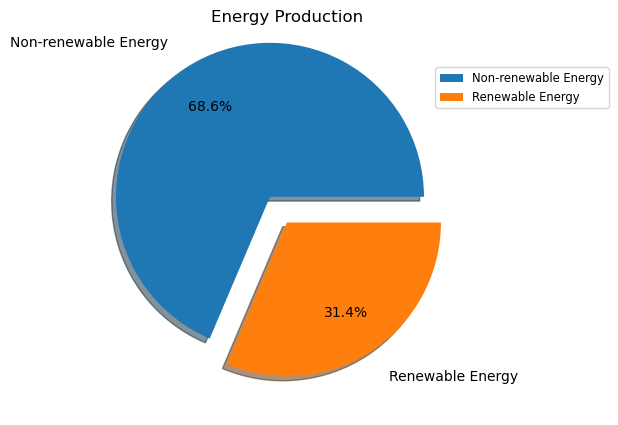

In [19]:
####The share of green and non-green energy production - pie chart
df_ren = df[["Nuclear", "Total Renewable Production"]].sum()
plt.figure(figsize= (5,5))
plt.pie(x = df_ren, labels = ["Non-renewable Energy", "Renewable Energy"], 
        explode = [0.2,0], autopct = lambda x: str(round(x,2)) + "%", labeldistance = 1.2, pctdistance = 0.7, shadow = True)
plt.legend(loc="center left", bbox_to_anchor=(0.87, 0.6, 0.5, 0.5), fontsize="small");
plt.title("Energy Production");

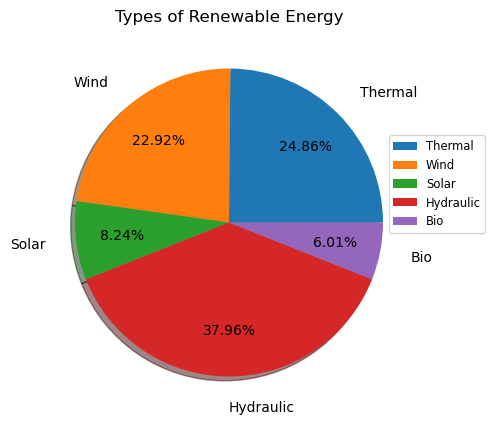

In [20]:
### The share of renewable energy types in total green production - pie chart
df_green_= df.iloc[:,10:15].sum()
plt.figure(figsize= (5,5))
plt.pie(x = df_green_, labels = ["Thermal", "Wind", "Solar", "Hydraulic", "Bio"], 
        explode = [0,0,0,0,0], autopct = lambda x: str(round(x,2)) + "%", labeldistance = 1.2, pctdistance = 0.7, shadow = True)
plt.legend(loc="center left", bbox_to_anchor=(0.9, 0.35, 0.5, 0.5), fontsize="small");
plt.title("Types of Renewable Energy");

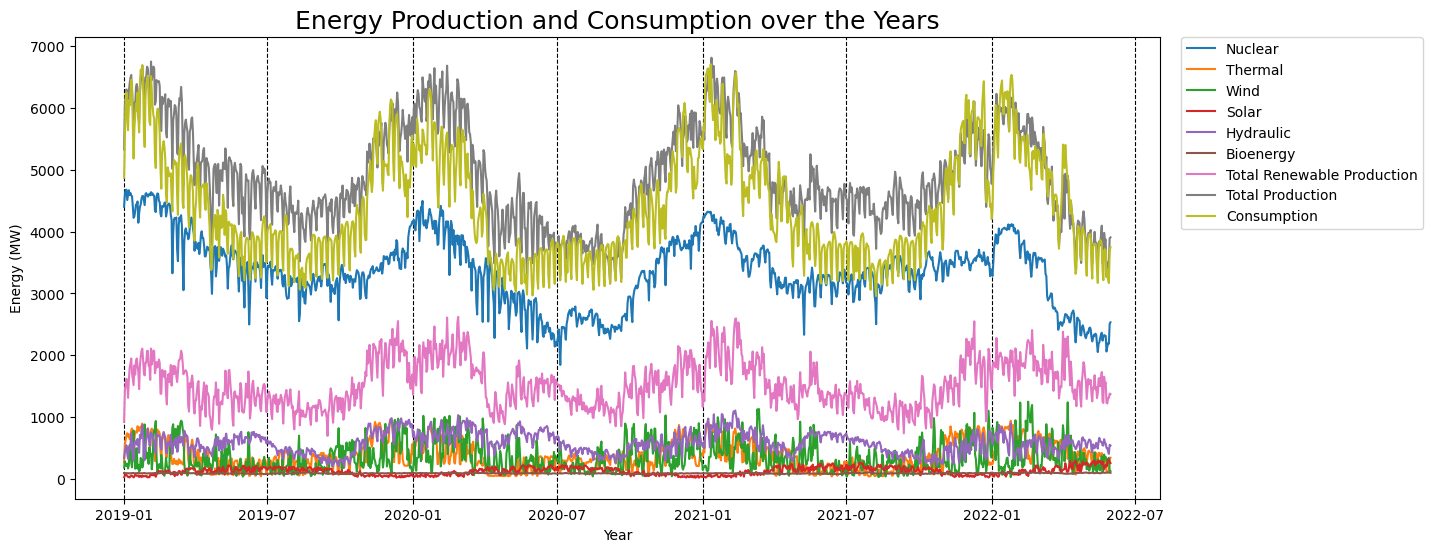

In [95]:
#### Renewable energy types in share of total energy production year over year

all_production = ['Nuclear', 'Thermal',  'Wind', 'Solar', 'Hydraulic', 'Bioenergy']

production_consumption = all_production + ['Total Renewable Production', 
                                           'Total Production',
                                           'Consumption'] 
cols_energy_overview = ['Total Production', 'Consumption']

fig, ax = plt.subplots(figsize = (14, 6))
for each in production_consumption:
    sns.lineplot(data = df, x = 'Date', y = each, label = str(each), ci = None)

ax.set(xlabel = 'Year', ylabel = 'Energy (MW)')
ax.grid(which ='major', axis = 'x', color = '#000000', linestyle = '--')
plt.title('Energy Production and Consumption over the Years', fontsize = 18)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.show() 

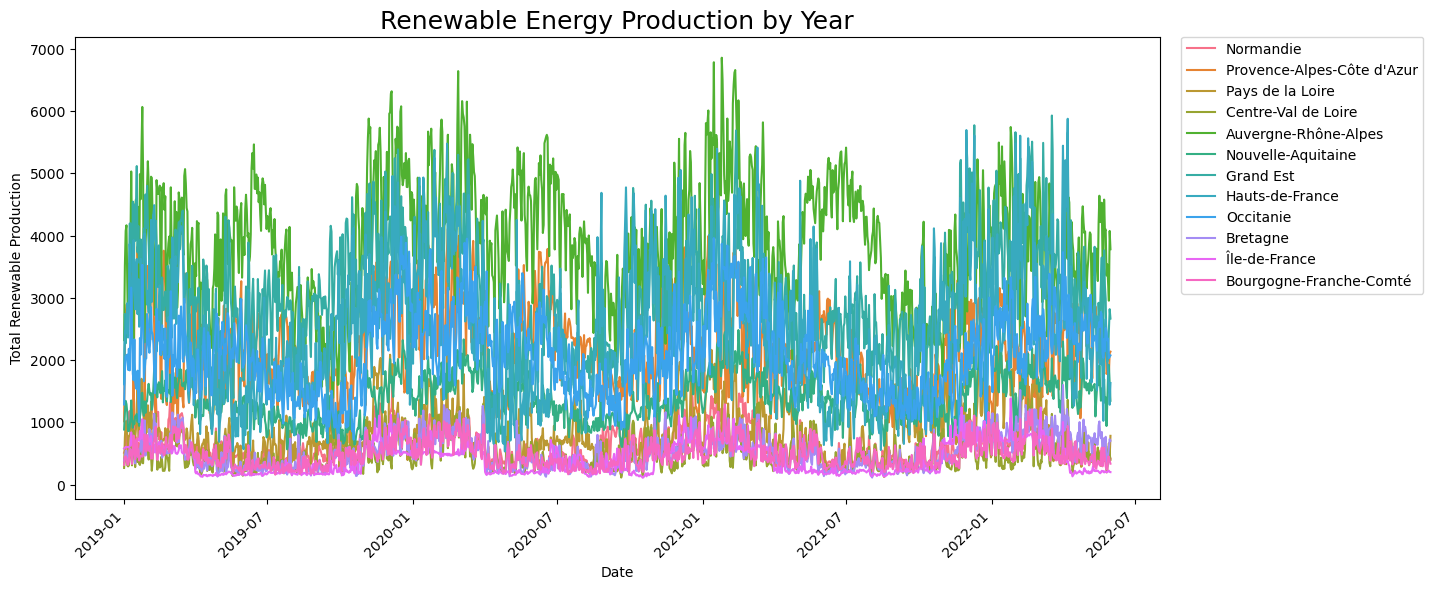

In [96]:
#### Renewable energy production by year and region

fig, ax = plt.subplots(figsize = (14, 6))
sns.lineplot(x = df['Date'], y = df['Total Renewable Production'],
             ci = None, hue = 'Region', data = df[['Date','Region'] + cols_energy_overview])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Renewable Energy Production by Year', fontsize = 18)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
plt.show()

###Model for Predicting the Consumption:

In [15]:
#### Dataframe modification and splitting the data:
df_reg= df.groupby(["Day", "Month", "Year"]).mean()
from sklearn.model_selection import train_test_split
X= df_reg.drop(["Consumption",'Consumption by pumps', 'Imp_exp Balance', 'Battery storage', 'Battery disposal'], axis=1)
y= df_reg["Consumption"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

#### Importing the relevant regression models:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#### Gradient Boosting Regression:
grad= GradientBoostingRegressor(max_depth=2,n_estimators =100)
grad.fit(X_train,y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in grad.staged_predict(X_test)]
b_n_estimator=np.argmin(errors)+1
grad_best=GradientBoostingRegressor(max_depth=3,n_estimators=b_n_estimator)
grad_best.fit(X_train,y_train)
print('GradientBoostingRegressor: Score on training=',grad_best.score(X_train,y_train))
print('GradientBoostingRegressor: Score on test=',grad_best.score(X_test,y_test))

GradientBoostingRegressor: Score on training= 0.9656768184502201
GradientBoostingRegressor: Score on test= 0.9343567194057731


In [16]:
####RandomForest
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print('Score on train:',rf.score(X_train, y_train))
print('Score on test:',rf.score(X_test, y_test))

Score on train: 0.9912078177839337
Score on test: 0.9358946785804269


1.0
0.8884146052017694


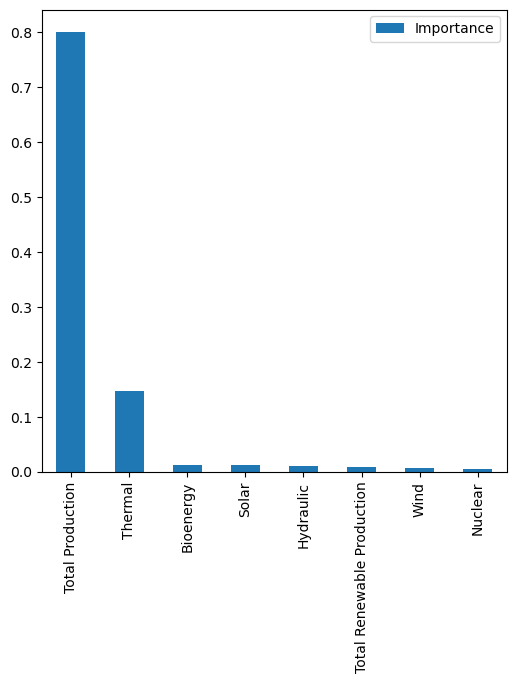

In [17]:
####Decision Tree Regression:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
print(dtr.score(X_train, y_train))
print(dtr.score(X_test,y_test))

#### Determinin the important features of the dataset:

feat_importances = pd.DataFrame(dtr.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
feat_importances.plot(kind="bar", figsize=(6,6));

1.0
0.8734544380841984


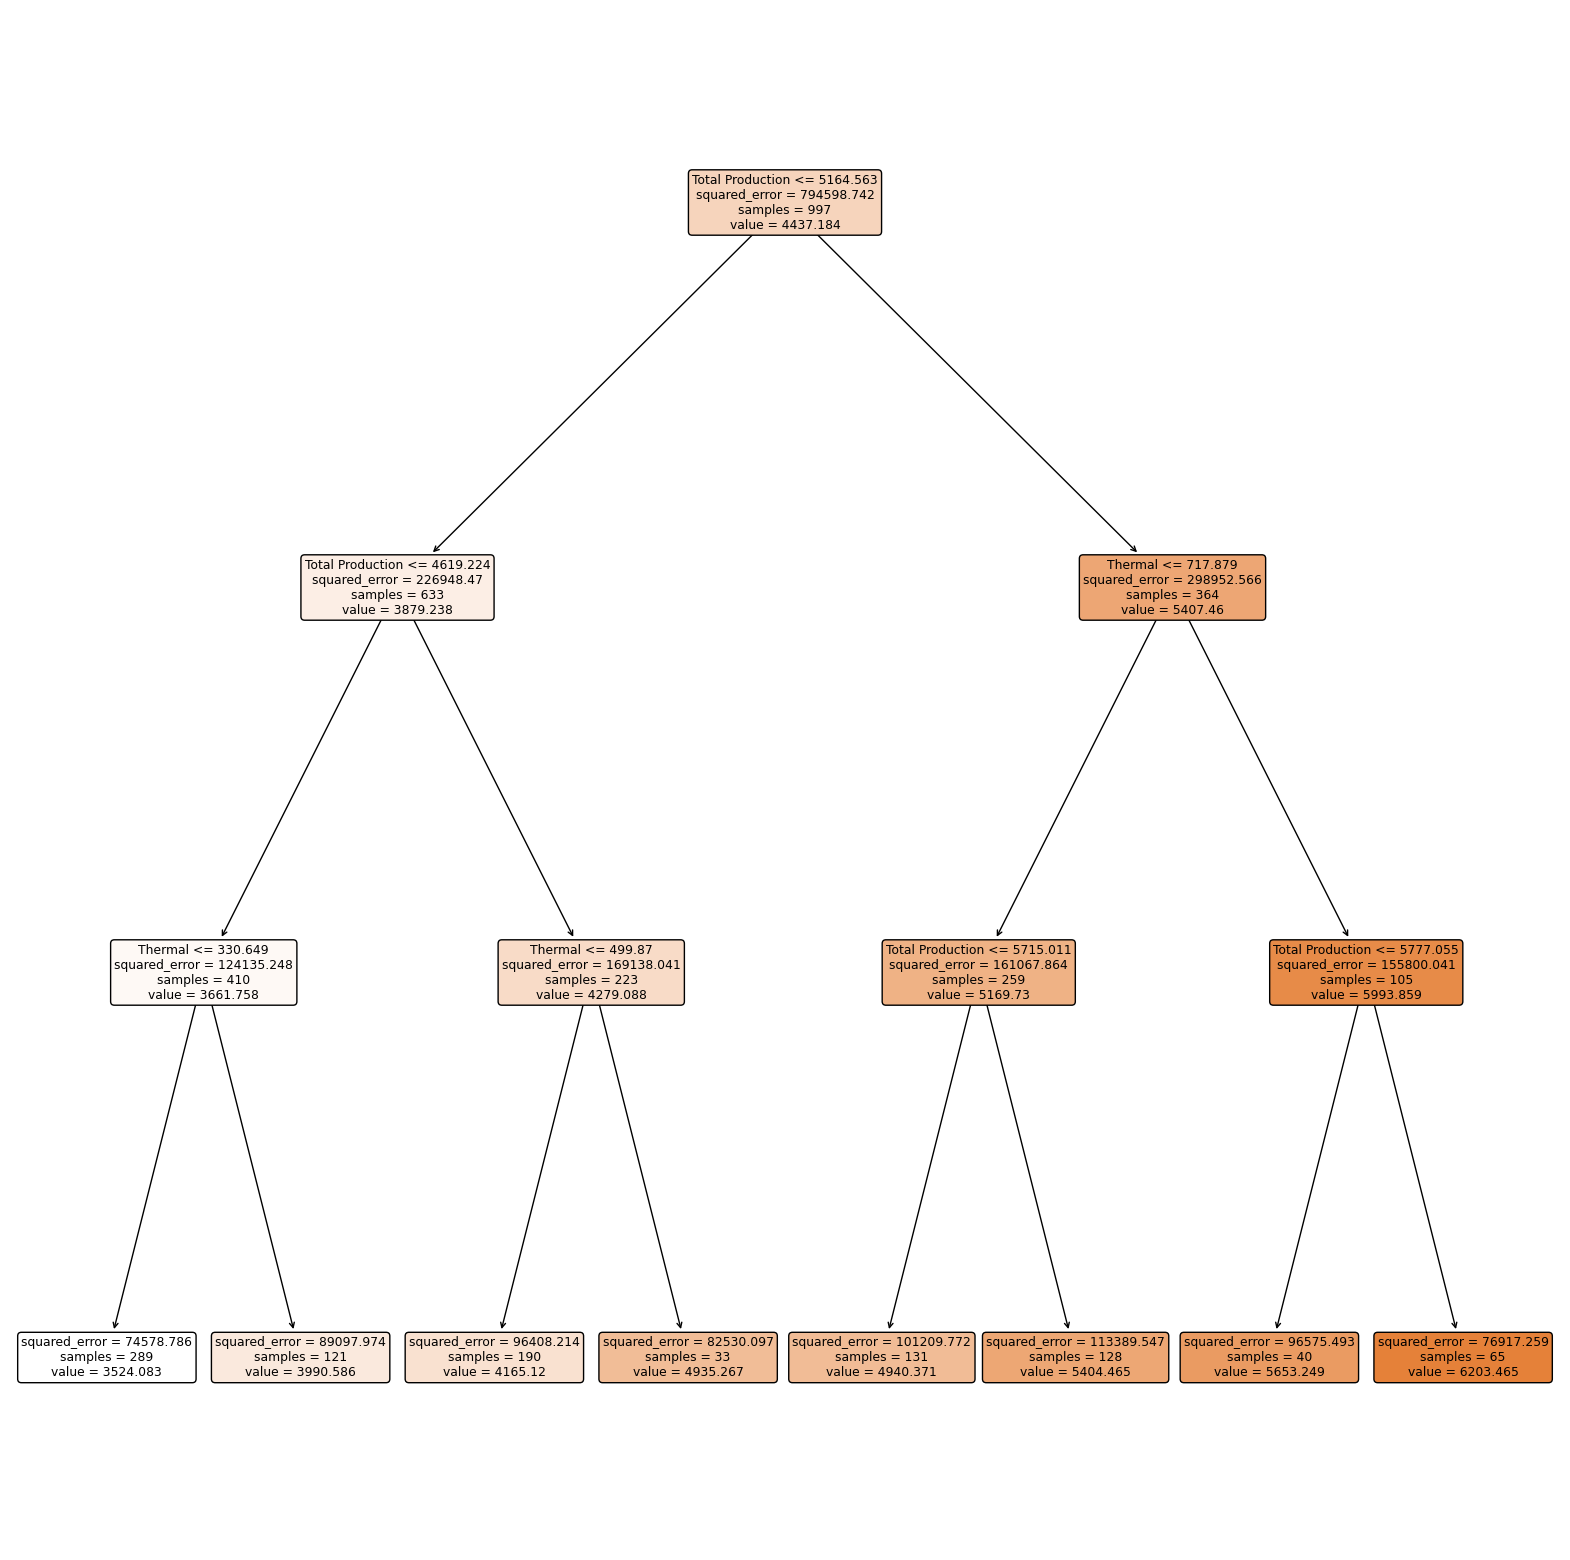

In [18]:
#### Remodelling the decision tree:
X_train_new = X_train[["Total Production", "Thermal", "Bioenergy", "Solar"]].copy()
X_test_new = X_test[["Total Production", "Thermal", "Bioenergy", "Solar"]].copy()

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_new, y_train)

print(dtr.score(X_train_new, y_train))
print(dtr.score(X_test_new, y_test))

#### The depiction of Decision Tree:

from sklearn.tree import plot_tree
dtr = DecisionTreeRegressor(random_state=42, max_depth = 3) 
dtr.fit(X_train_new, y_train)
fig, ax = plt.subplots(figsize=(20, 20))  
plot_tree(dtr, 
          feature_names = ["Total Production", "Thermal", "Bioenergy", "Solar"], 
          filled = True, 
          rounded = True);

,Estimated value
Intercept,0.421120
Consumption,-0.004497
Total Production,0.002830
Total Renewable Production,0.001228
Nuclear,0.001602
Thermal,0.000705
Wind,0.000396
Solar,0.000644
Hydraulic,0.000543
Bioenergy,-0.001061


0.511655609990358
0.44532189733452565


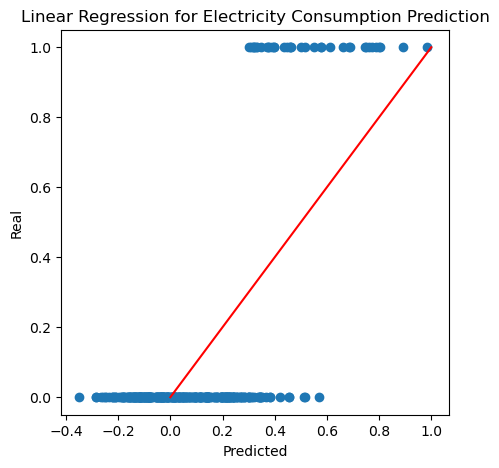

In [36]:
#### Linear Regression:
lr= LinearRegression()
lr.fit(X_train,y_train)

coeffs= list(lr.coef_)
coeffs.insert(0, lr.intercept_)
X2= list(X.columns)
X2.insert(0, "Intercept")
coefficients = pd.DataFrame({"Estimated value": coeffs}, index=X2)
display(coefficients)
print(lr.score(X_train,y_train))
print(lr.score(X_test, y_test))

####Linear Regression for Electricity Consumption Prediction
y_pred_lr= lr.predict(X_test)
fig = plt.figure(figsize=(5,5))
plt.scatter(y_pred_lr, y_test)
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color="red")
plt.title("Linear Regression for Electricity Consumption Prediction")
plt.xlabel("Predicted")
plt.ylabel("Real");

In [20]:
####Lasso Regression
lasso=Lasso(alpha=0.1) # or alpha=0.2 or 0.3 as long as the dataset is optimal
lasso.fit(X_train, y_train)
y_pred_lasso=lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred_lasso)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test,y_test))

0.926247082772108
0.9279046435171849


C:\Users\nurse\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.027e+07, tolerance: 7.922e+04
  model = cd_fast.enet_coordinate_descent(


In [21]:
#### Performance Evaluation:

import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Decision Tree:
y_pred_dtr= dtr.predict(X_test_new)
y_pred_train_dtr= dtr.predict(X_train_new)

mae_dtr_train= mean_absolute_error(y_train, y_pred_train_dtr)
mse_dtr_train = mean_squared_error(y_train, y_pred_train_dtr)
rmse_dtr_train= mean_squared_error(y_train, y_pred_train_dtr, squared=False)
mae_dtr_test= mean_absolute_error(y_test, y_pred_dtr)
mse_dtr_test= mean_squared_error(y_test, y_pred_dtr)
rmse_dtr_test = mean_squared_error(y_test, y_pred_dtr, squared=False)

#Random Forest:
y_pred_rf= rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

mae_rf_train= mean_absolute_error(y_train, y_pred_rf_train)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
rmse_rf_train= mean_squared_error(y_train, y_pred_rf_train, squared=False)
mae_rf_test= mean_absolute_error(y_test, y_pred_rf)
mse_rf_test= mean_squared_error(y_test, y_pred_rf)
rmse_rf_test = mean_squared_error(y_test, y_pred_rf, squared=False)

#Linear regression:
y_pred_lr= lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

mae_lr_train= mean_absolute_error(y_train, y_pred_lr_train)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
rmse_lr_train= mean_squared_error(y_train, y_pred_lr_train, squared=False)
mae_lr_test= mean_absolute_error(y_test, y_pred_lr)
mse_lr_test= mean_squared_error(y_test, y_pred_lr)
rmse_lr_test = mean_squared_error(y_test, y_pred_lr, squared=False)

#Lasso regression:
y_pred_lasso=lasso.predict(X_test)
y_pred_lasso_train=lasso.predict(X_train)

mae_lasso_train= mean_absolute_error(y_train, y_pred_lasso_train)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
rmse_lasso_train= mean_squared_error(y_train, y_pred_lasso_train, squared=False)
mae_lasso_test= mean_absolute_error(y_test, y_pred_lasso)
mse_lasso_test= mean_squared_error(y_test, y_pred_lasso)
rmse_lasso_test = mean_squared_error(y_test, y_pred_lasso, squared=False)

### Gradient Boosting regression:
y_pred_grad=grad_best.predict(X_test)
y_pred_grad_train=grad_best.predict(X_train)

mae_grad_train= mean_absolute_error(y_train, y_pred_grad_train)
mse_grad_train = mean_squared_error(y_train, y_pred_grad_train)
rmse_grad_train= mean_squared_error(y_train, y_pred_grad_train, squared=False)
mae_grad_test= mean_absolute_error(y_test, y_pred_grad)
mse_grad_test= mean_squared_error(y_test, y_pred_grad)
rmse_grad_test = mean_squared_error(y_test, y_pred_grad, squared=False)


data = {"mae train": [mae_dtr_train, mae_rf_train, mae_lr_train, mae_lasso_train, mae_grad_train],
       "mae test": [mae_dtr_test, mae_rf_test, mae_lr_test, mae_lasso_test, mae_grad_test],
       "mse train": [mse_dtr_train, mse_rf_train, mse_lr_train, mse_lasso_train, mse_grad_train],
       "mse test": [mse_dtr_test, mse_rf_test, mse_lr_test, mse_lasso_test, mse_grad_test],
       "rmse train": [rmse_dtr_train, rmse_rf_train, rmse_lr_train, rmse_lasso_train, rmse_grad_train],
       "rmse test": [rmse_dtr_test, rmse_rf_test, rmse_lr_test, rmse_lasso_test, rmse_grad_test]}
df_ = pd.DataFrame(data, index= ["Decision Tree", "Random Forest", "Linear Regression", "Lasso Reegression", "Gradient Regression"] )
df_.head()

,mae train,mae test,mse train,mse test,rmse train,rmse test
Decision Tree,241.771934,269.144520,90281.004562,107992.305862,300.467976,328.621828
Random Forest,62.974321,177.411054,6986.256931,50018.139554,83.583832,223.647355
Linear Regression,188.335916,188.311126,58605.777124,56263.600850,242.086301,237.199496
Lasso Reegression,188.332348,188.330867,58603.975269,56252.359740,242.082579,237.175799
Gradient Regression,123.642850,181.628722,27273.156891,51218.131300,165.145865,226.314231


,Actual,Predicted
Year,,
2019,4469.604269,4533.612233
2020,4254.173825,4289.486136
2021,4443.306052,4437.251921
2022,4481.443848,4387.403671


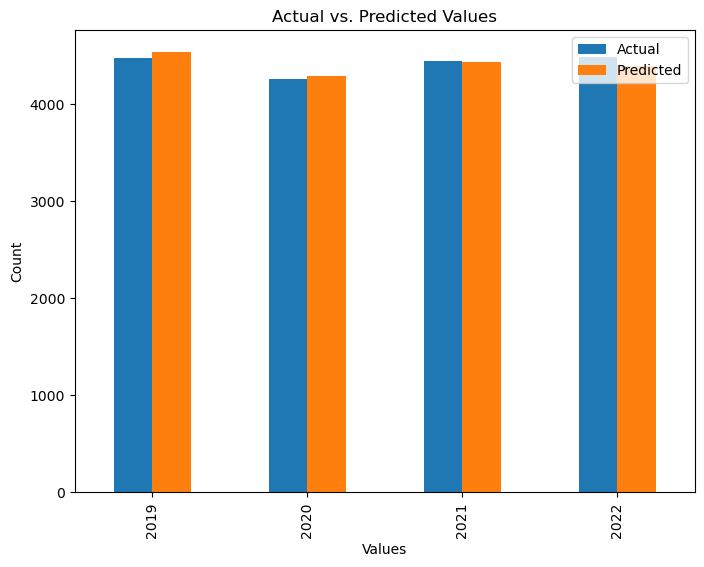

In [22]:
####Comparison of model with real data:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
df_pred
pred = df_pred.groupby('Year').mean()
display(pred)
ax = pred.plot(kind='bar', figsize=(8, 6))
ax.set_xlabel('Values')
ax.set_ylabel('Count')
ax.set_title('Actual vs. Predicted Values');

###Model Creation for Predicting Blackout:

In [23]:
#### Classification model:
df["Difference"] = df["Total Production"] - df["Consumption"]
df2 = df.groupby(["Day", "Month", "Year"]).mean()

### Create a classification columns 1 and 0: 0 no blackout 1 blackout:
Blackout = []
for i in df2["Difference"]:
    if i < 0:
        Blackout.append(True)
    else:
        Blackout.append(False)
df2["Blackout"] = Blackout
df2.head()

Consumption  Total Production  Total Renewable Production  \
Day Month Year                                                              
1   1     2019  4871.407986       5328.980903                  926.420139   
          2020  5065.508681       5502.814236                 1366.479167   
          2021  5331.239583       5345.630208                 1167.847222   
          2022  4202.406250       4772.576389                 1444.406250   
    2     2019  6161.965278       6422.529514                 1829.461806   

                    Nuclear     Thermal        Wind      Solar   Hydraulic  \
Day Month Year                                                               
1   1     2019  4402.560764  272.111111  186.239583  29.982639  342.013889   
          2020  4136.335069  400.149306  145.848958  40.449653  681.935764   
          2021  4177.782986  368.119792  144.842014  40.718750  519.526042   
          2022  3328.170139  236.795139  345.005208  91.206597  668.649306   
    2     2019  4593.067708  736.302083  244.628472  35.937500  718.243056   

                 Bioenergy  Consumption by pumps  Imp_exp Balance  \
Day Month Year                                                      
1   1     2019   96.072917           -174.427083      -283.171875   
          2020   98.095486           -112.796875      -324.560764   
          2021   94.640625            -91.899306        49.154514   
          2022  102.750000           -117.890625        37.769097   
    2     2019   94.350694            -68.536458      -192.024306   

                Battery storage  Battery disposal  Difference  Blackout  
Day Month Year                                                           
1   1     2019         0.000000          0.000000  457.572917     False  
          2020         0.000000          0.000000  437.305556     False  
          2021        77.621528          6.957101   14.390625     False  
          2022      -452.236111          6.274705  570.170139     False  
    2     2019         0.000000          0.000000  260.564236     False

In [24]:
#### Splitting the data:
from sklearn.model_selection import train_test_split
X= df2.drop("Blackout", axis=1)
y= df2["Blackout"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)
y.value_counts(normalize=True)

#### Convert boolean to int:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

#### Standardization of data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Logistic Regression:
from sklearn.linear_model import LogisticRegression

reglog= LogisticRegression()
reglog.fit(X_train, y_train)
y_pred_reglog= reglog.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_reglog))
display(pd.crosstab(y_test, y_pred_reglog, rownames=["Real"], colnames=["Prediction"]))
print("Score on the train set", reglog.score(X_train, y_train))
print("Score on the test set", reglog.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       275
           1       1.00      0.92      0.96        37

    accuracy                           0.99       312
   macro avg       0.99      0.96      0.98       312
weighted avg       0.99      0.99      0.99       312



Prediction,0,1
Real,,
0,275,0
1,3,34


Score on the train set 0.9893048128342246
Score on the test set 0.9903846153846154


In [25]:
#### Bagging:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier(n_estimators=500, base_estimator = reglog, oob_score=True)
bc.fit(X_train,y_train)
bc.oob_score_
y_pred_bc= bc.predict(X_test)
print(bc.score(X_test, y_test))
display(pd.crosstab(y_test, y_pred_bc, rownames=["Real"], colnames=["Prediction"]))
print(classification_report(y_test,y_pred_bc))

0.9871794871794872


Prediction,0,1
Real,,
0,275,0
1,4,33


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       275
           1       1.00      0.89      0.94        37

    accuracy                           0.99       312
   macro avg       0.99      0.95      0.97       312
weighted avg       0.99      0.99      0.99       312



In [26]:
#### Boosting:
from sklearn.ensemble import AdaBoostClassifier
ac= AdaBoostClassifier(n_estimators=400, base_estimator = reglog)
ac.fit(X_train,y_train)
ac.score(X_test, y_test)
y_pred_ac=ac.predict(X_test)
display(pd.crosstab(y_test, y_pred_ac,rownames=["real"], colnames=["predicted"]))
print(ac.score(X_test, y_test))
print(classification_report(y_test,y_pred_ac))

predicted,0,1
real,,
0,274,1
1,0,37


0.9967948717948718
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       0.97      1.00      0.99        37

    accuracy                           1.00       312
   macro avg       0.99      1.00      0.99       312
weighted avg       1.00      1.00      1.00       312



In [27]:
#### Decision Tree:
from sklearn import tree
clf= tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
print("Score on the train set", clf.score(X_train, y_train))
print("Score on the test set", clf.score(X_test, y_test))

y_pred_clf= clf.predict(X_test)
display(pd.crosstab(y_test, y_pred_clf, rownames=["Real"], colnames=["Prediction"]))
print(classification_report(y_test, y_pred_clf))

Score on the train set 1.0
Score on the test set 1.0


Prediction,0,1
Real,,
0,275,0
1,0,37


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        37

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



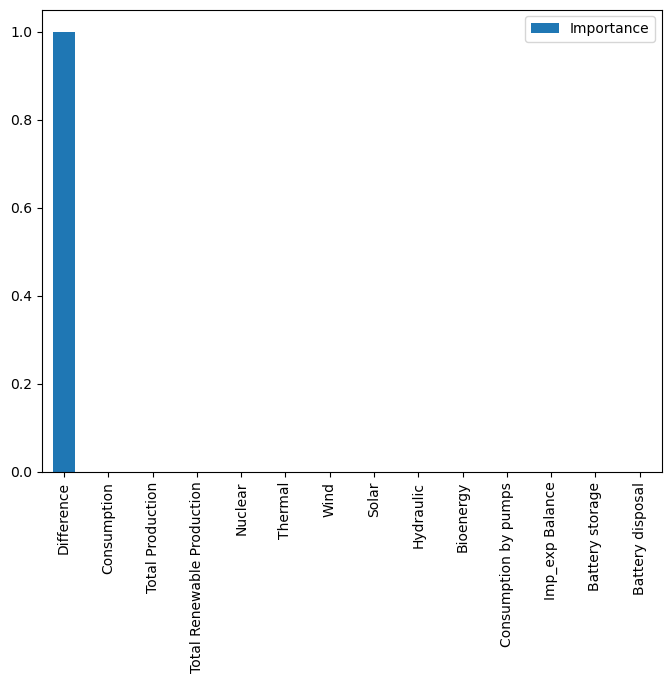

In [29]:
#### Determinin the important features of the dataset:
import matplotlib.pyplot as plt
%matplotlib inline
feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by="Importance", ascending=False, inplace=True)
feat_importances.plot(kind="bar", figsize=(8,6));

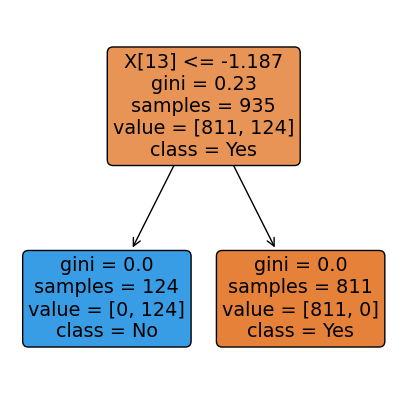

In [30]:
#### Depiction of Decision Tree:

from sklearn.tree import plot_tree 
clf = tree.DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(5, 5))  
plot_tree(clf,
          class_names = ['Yes','No'],
          filled = True, 
          rounded = True)

plt.show()

In [31]:
#### Random Forest:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Score on the train set", rfc.score(X_train,y_train))
print("Score on the test set", rfc.score(X_test, y_test))

y_pred_rfc = rfc.predict(X_test)
display(pd.crosstab(y_test, y_pred_rfc, colnames= ["Predictions"], rownames=["Real"]))
print(classification_report(y_test, y_pred_rfc))

Score on the train set 1.0
Score on the test set 1.0


Predictions,0,1
Real,,
0,275,0
1,0,37


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00        37

    accuracy                           1.00       312
   macro avg       1.00      1.00      1.00       312
weighted avg       1.00      1.00      1.00       312



In [32]:
#### SVM:
X= df2.drop("Blackout", axis=1)
y= df2["Blackout"]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

from sklearn import svm
svm= svm.SVC(gamma=0.01, kernel="poly")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Score on the train set", svm.score(X_train,y_train))
print("Score on the test set", svm.score(X_test, y_test))
display(pd.crosstab(y_test, y_pred_svm, rownames=["real"], colnames=["predicted"]))
print(classification_report(y_test, y_pred_svm))

### Optimize the hyperparameters for the model:
from sklearn.model_selection import GridSearchCV
parameters= {"C":[0.1,1,10], "kernel": ["rbf", "linear", "poly"], "gamma": [0.001,0.1,0.5]}
grid_svm= GridSearchCV(estimator=svm, param_grid=parameters)
grid= grid_svm.fit(X_train, y_train)
best_params= pd.DataFrame.from_dict(grid.cv_results_).loc[:,['params', 'mean_test_score']]
display(best_params.sort_values(by="mean_test_score", ascending=False))

print(grid_svm.best_params_)

Score on the train set 1.0
Score on the test set 0.9935897435897436


predicted,False,True
real,,
False,274,1
True,1,36


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       275
        True       0.97      0.97      0.97        37

    accuracy                           0.99       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.99      0.99      0.99       312



,params,mean_test_score
26,"{'C': 10, 'gamma': 0.5, 'kernel': 'poly'}",0.990374
14,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.990374
2,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.990374
23,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.990374
5,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.990374
20,"{'C': 10, 'gamma': 0.001, 'kernel': 'poly'}",0.990374
8,"{'C': 0.1, 'gamma': 0.5, 'kernel': 'poly'}",0.990374
17,"{'C': 1, 'gamma': 0.5, 'kernel': 'poly'}",0.990374
11,"{'C': 1, 'gamma': 0.001, 'kernel': 'poly'}",0.990374
25,"{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}",0.987166


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}


In [33]:
### Apply the best parameteres to the model again:
from sklearn import svm
svm2= svm.SVC(C= 0.1, gamma= 0.001, kernel= "poly")
svm2.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)
print("Score on the train set", svm2.score(X_train,y_train))
print("Score on the test set", svm2.score(X_test, y_test))
display(pd.crosstab(y_test, y_pred_svm2, rownames=["real"], colnames=["predicted"]))
print(classification_report(y_test, y_pred_svm2))

Score on the train set 1.0
Score on the test set 0.9935897435897436


predicted,False,True
real,,
False,274,1
True,1,36


              precision    recall  f1-score   support

       False       1.00      1.00      1.00       275
        True       0.97      0.97      0.97        37

    accuracy                           0.99       312
   macro avg       0.98      0.98      0.98       312
weighted avg       0.99      0.99      0.99       312



In [34]:
#### Application of Bagging Classifier at SVM model:
from sklearn.ensemble import BaggingClassifier
bc2= BaggingClassifier(n_estimators=500, oob_score=True, base_estimator= svm2)
bc2.fit(X_train,y_train)
print(bc2.oob_score_)
y_pred_bc2= bc2.predict(X_test)
print(bc2.score(X_test, y_test))
print(classification_report(y_test, y_pred_bc2))
display(pd.crosstab(y_test, y_pred_bc2, rownames=["real"], colnames=["predicted"]))

0.9957219251336898
0.9967948717948718
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       275
        True       0.97      1.00      0.99        37

    accuracy                           1.00       312
   macro avg       0.99      1.00      0.99       312
weighted avg       1.00      1.00      1.00       312



predicted,False,True
real,,
False,274,1
True,0,37


###Time Series (SARIMA) Model:

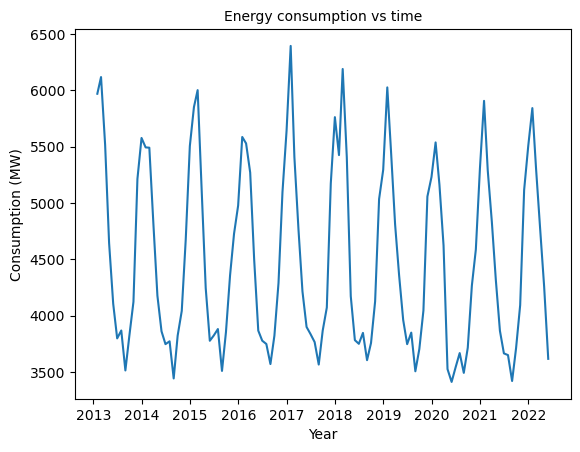

In [116]:
#### Time Series Analysis

df_ts = pd.read_csv("eco2mix-regional-cons-def.csv", header = 0, sep=";")
df_ts= df_ts[["Date", 'Consommation (MW)']]
df_ts['Date'] = pd.to_datetime(df_ts['Date'])
df_ts = df_ts.set_index("Date")
df_ts = df_ts.resample('M').mean()
new_cols = ["Consumption"]
df_ts.columns = new_cols
df_ts=df_ts.squeeze()
df_ts.index

plt.plot(df_ts) 
plt.title('Energy consumption vs time', fontsize = 10)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Consumption (MW)', fontsize = 10)
plt.show()

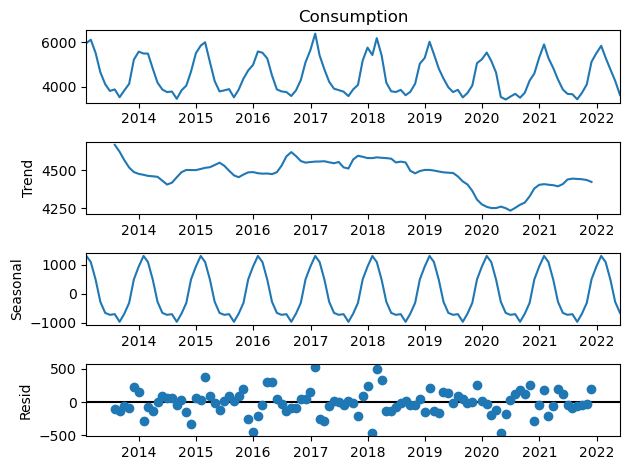

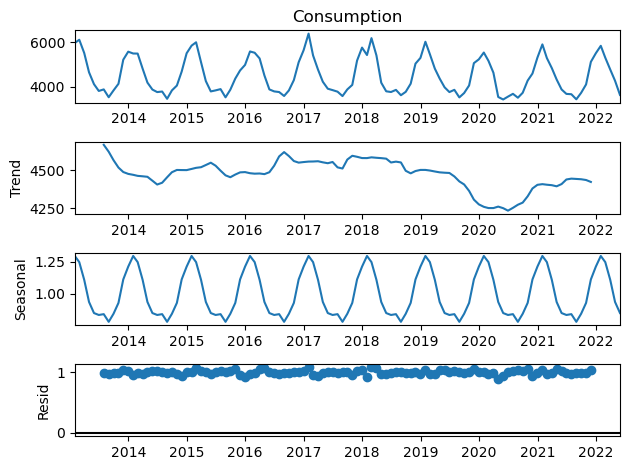

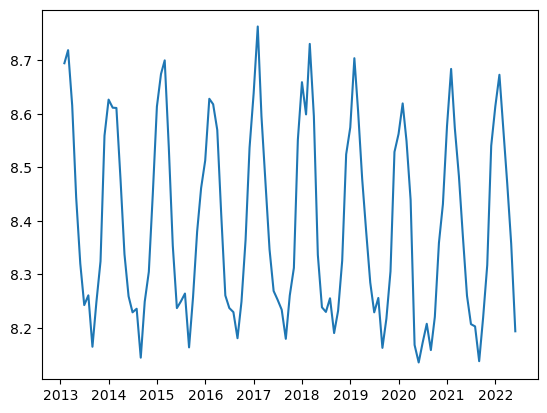

In [117]:
####Log transform of time series
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_ts)
res.plot()
plt.show()

res = seasonal_decompose(df_ts, model = 'multiplicative')
res.plot()
plt.show()

dflog = np.log(df_ts) 
plt.plot(dflog)
plt.show()

In [118]:
# SARIMA model
dflog = np.log(df_ts) # Log transform
dflog_1 = dflog.diff().dropna() # Simple difference
dflog_2 = dflog_1.diff(periods = 12).dropna() # 12-order difference

import statsmodels.api as sm
_, p_value, _, _, _, _  = sm.tsa.stattools.adfuller(dflog_2)
p_value  # p-value below 1% the time series can be considered stationnary

4.796640777188463e-07

In [119]:
####Summary of SARIMA Model
model = sm.tsa.SARIMAX(dflog,order = (1,1,1),seasonal_order = (0,1,0,24))
sarima = model.fit()
print(sarima.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         Consumption   No. Observations:                  113
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 24)   Log Likelihood                 126.278
Date:                             Fri, 10 Mar 2023   AIC                           -246.556
Time:                                     23:39:28   BIC                           -239.124
Sample:                                 01-31-2013   HQIC                          -243.562
                                      - 05-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2408      0.142      1.700      0.089      -0.037       0.519
ma.L1         -0.8336      

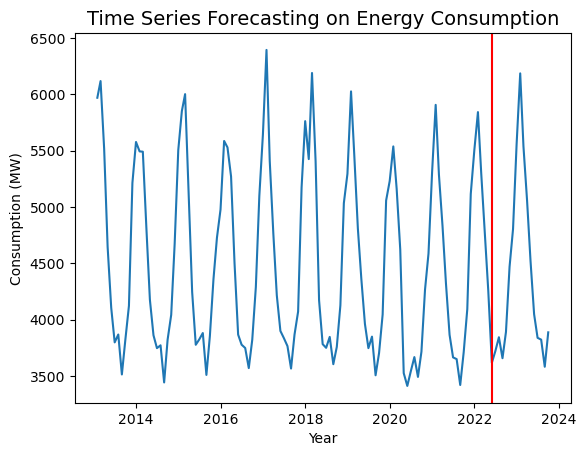

In [121]:
####Time Series Forecasting
import datetime 
pred= np.exp(sarima.predict (113,128))
df_pred= pd.concat([df_ts, pred])
plt.plot(df_pred)
plt.axvline(x=datetime.date(2022,5,31), color="red")
plt.title('Time Series Forecasting on Energy Consumption', fontsize = 14)
plt.xlabel('Year', fontsize =10)
plt.ylabel('Consumption (MW)', fontsize = 10);

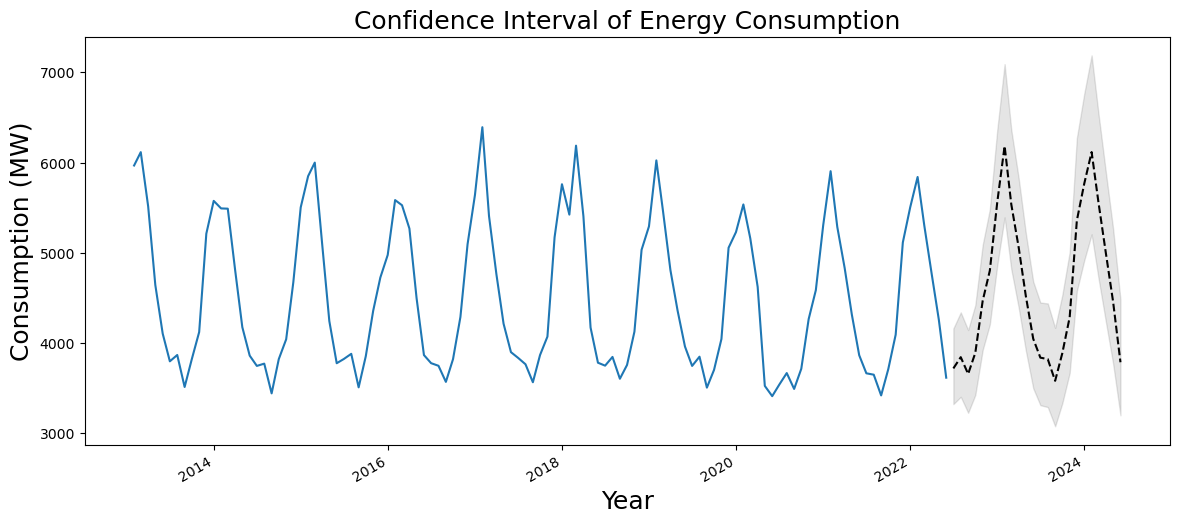

Consumption,mean,mean_se,mean_ci_lower,mean_ci_upper
2022-06-30,3720.709009,1.059029,3325.116090,4163.366076
2022-07-31,3845.395691,1.063884,3405.878762,4341.630766
2022-08-31,3659.210538,1.065834,3229.365471,4146.270184
2022-09-30,3892.511304,1.067275,3426.172836,4422.323386
2022-10-31,4469.647657,1.068590,3924.682857,5090.283956
2022-11-30,4804.410763,1.069860,4208.823003,5484.279753
2022-12-31,5559.387168,1.071103,4859.129469,6360.560237
2023-01-31,6185.564915,1.072327,5394.353563,7092.826393
2023-02-28,5538.791694,1.073531,4819.693559,6365.179248
2023-03-31,5061.339123,1.074718,4394.698959,5829.103189


In [122]:
####Forecasting the Consumption with SARIMA Model
prediction = sarima.get_forecast(steps = 24).summary_frame()  #PForecasting with a confidence interval
fig, ax = plt.subplots(figsize = (14,6))
plt.plot(df_ts)
prediction = np.exp(prediction) # Exponential Transform
prediction['mean'].plot(ax = ax, style = 'k--') # Plotting the mean
ax.fill_between(prediction.index, prediction['mean_ci_lower'], prediction['mean_ci_upper'], color ='k', alpha=0.1); #Plotting the confidence interval
plt.title('Confidence Interval of Energy Consumption', fontsize = 18)
plt.xlabel('Year', fontsize =18)
plt.ylabel('Consumption (MW)', fontsize = 18)
plt.show()
display(prediction)